## Stepik - Машинное обучение (ОмГТУ Омский государственный технический университет)
https://stepik.org/course/8057/info
## Задача1

Однажды я попросил, чтобы студенты ответили на два вопроса анкеты «ваш год рождения» и «ваш возраст».

Из их ответов я сформировал таблицу, в которой был столбец Р=«год рождения студента» и Q=«возраст студента».

Оказывается, значение коэффициента корреляции признаков P и Q зависит от месяца, в котором проводилось анкетирование (это не шутка!). Укажите два месяца, которым соответствует наименьшее (по модулю) значение коэффициента корреляции признаков P и Q.

In [129]:
import pandas as pd

data = pd.DataFrame({"birthday" : pd.date_range(start='1/1/1989', end='1/1/2006', periods=100)})

for num, mn in enumerate("January February March April May June July August September October November December".split(), start=1):
    data[mn] = data.birthday.apply(lambda x: int((pd.to_datetime(f'2021-{num}-04 00:00:00') - x).days/365.2 ))
    data['year'] = data.birthday.apply(lambda x: x.year)
data.corr().year.sort_values(ascending=False)

year         1.000000
July        -0.994912
June        -0.995058
August      -0.995161
May         -0.995357
September   -0.995566
April       -0.995998
October     -0.996424
March       -0.996868
November    -0.997396
February    -0.998016
December    -0.998684
January     -0.999600
Name: year, dtype: float64

In [130]:
data

,birthday,January,year,February,March,April,May,June,July,August,September,October,November,December
0,1989-01-01 00:00:00.000000000,32,1989,32,32,32,32,32,32,32,32,32,32,32
1,1989-03-04 17:12:43.636363636,31,1989,31,32,32,32,32,32,32,32,32,32,32
2,1989-05-06 10:25:27.272727272,31,1989,31,31,31,31,32,32,32,32,32,32,32
3,1989-07-08 03:38:10.909090908,31,1989,31,31,31,31,31,31,32,32,32,32,32
4,1989-09-08 20:50:54.545454544,31,1989,31,31,31,31,31,31,31,31,32,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2005-04-25 03:09:05.454545408,15,2005,15,15,15,16,16,16,16,16,16,16,16
96,2005-06-26 20:21:49.090909056,15,2005,15,15,15,15,15,16,16,16,16,16,16
97,2005-08-28 13:34:32.727272704,15,2005,15,15,15,15,15,15,15,16,16,16,16
98,2005-10-30 06:47:16.363636352,15,2005,15,15,15,15,15,15,15,15,15,16,16


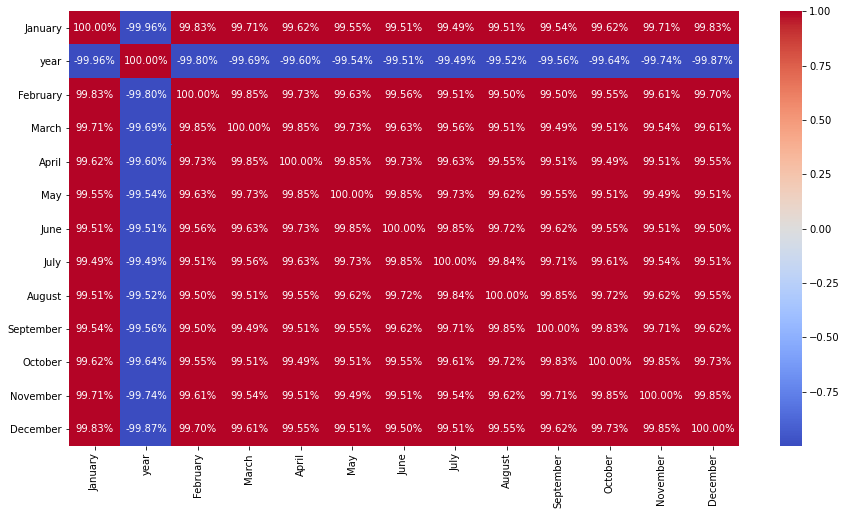

In [131]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm', fmt=".2%");

Ответ: июнь, июль (середина года, максимальная неопределеннось)

## Задача 2

Использование метрик для заполнения пропущенных числовых значений.
- Евклидова метрика sqrt((x1-x2)^2 + (y1-y2)^2 + ...)
- Метрика Манхеттен (|x1-x2| + |y1-y2| + ...)
- Мах метрика MAX(|x1-x2| + |y1-y2| + ...)

Пример. Дана таблица с пропущенным значением в последнем столбце.
Отбросим последний столбец и посчитаем метрики схожести объектов(строк):
![alt text](./metrics.jpg)


![alt text](./metric_formula.jpg)

In [132]:
import pandas as pd
import numpy as np
from numpy import NaN

# Создадим датафрейм с пропущенным значением признака Р для объекта А
df = pd.DataFrame({'P1':[3,5,4,5], 'P2':[4,5,3,4], 'P3':[5,5,3,3], 'P4':[3,4,2,3], 'P':[4,3,5,NaN]}, index=['A1', 'A2', 'A3', 'A'])
df

,P1,P2,P3,P4,P
A1,3,4,5,3,4.0
A2,5,5,5,4,3.0
A3,4,3,3,2,5.0
A,5,4,3,3,NaN


In [133]:
# Посчитаем метрики
dict_metrics = {'A1':[], 'A2':[], 'A3':[]}
for i in df.index[:-1]:
    dict_metrics[i].append(np.power((df.loc['A'][:-1] - df.loc[i][:-1]).pow(2).sum(), 0.5).round(2)) # считаем Евклидово расстояние
    dict_metrics[i].append((df.loc['A'][:-1] - df.loc[i][:-1]).abs().sum()) # считаем Манхэттеновское расстояние
    dict_metrics[i].append((df.loc['A'][:-1] - df.loc[i][:-1]).abs().max()) # считаем max-метрику

metrics = pd.DataFrame(dict_metrics, index=['Euclid', 'Manhatten', 'Max'])
metrics

,A1,A2,A3
Euclid,2.83,2.45,1.73
Manhatten,4.00,4.00,3.00
Max,2.00,2.00,1.00


In [134]:
# Считаем варианты значений для каждой метрики
dict_value = {'Euclid':[], 'Manhatten':[], 'Max':[]}
for metric in metrics.index:
    
    # нормирующий множитель
    norm_mul = (1 / ((1 / metrics.loc[metric]).sum())) 
    
    # значение признака * мера близости(=величина, обратно пропорциональная мере расстояния)
    similarity = (df.loc[:, 'P'][:-1] / metrics.loc[metric]).sum() 
    value_P = (norm_mul * similarity).round(2)
    dict_value[metric].append(value_P)
    print(f'значение признака P для А по метрике {i}: {value_P}')

значение признака P для А по метрике A3: 4.13
значение признака P для А по метрике A3: 4.1
значение признака P для А по метрике A3: 4.25


## Задача 3

Дана таблица с параметрами моделей. Строки модели, столбцы параметры: Грудь, Талия, Бедра, Рост, Вес.
Значение размера груди у одной модели отсутуствует. Найдем его с помощью коеффициента корреляции.

![alt text](./kk.jpg)

Для пропущенного значения:

![alt text](./kk2.jpg)

In [153]:
import pandas as pd
import numpy as np
from numpy import NaN
from sklearn import preprocessing

df = pd.DataFrame({'bust':[99,89,91,91,86,97,NaN], 
              'waidt':[56,58,64,51,56,53,51], 
              'hips':[91,89,91,91,84,86,91], 
              'height':[160,157,165,170,157,175,165], 
              'weight':[58,48,54,54,44,56,54]}, index=['W1','W2','W3','W4','W5','W6','W7'])

df

,bust,waidt,hips,height,weight
W1,99.0,56,91,160,58
W2,89.0,58,89,157,48
W3,91.0,64,91,165,54
W4,91.0,51,91,170,54
W5,86.0,56,84,157,44
W6,97.0,53,86,175,56
W7,NaN,51,91,165,54


In [151]:
# Значение признака, рассчитанное с помощью коеф.корреляции по признакам
def pred_kk_bya_feature(df, pred_object, pred_feature):
    temp = df.corr()[pred_feature]
    KK = temp[temp.index != pred_feature]
    KK # КК для всех признаков

    temp = df[df.index != pred_object].mean(axis=0)
    mean_all_feature = temp[temp.index != pred_feature]
    mean_all_feature # Среднее значение для всех признаков (кроме предсказываемого) по всем 
    #наблюдениям (кроме предсказываемого)
    
    # Значения известных признаков предсказываемого наблюдения
    all_feature_pred_object = df.loc[pred_object][df.loc[pred_object].index != pred_feature] 

    # сумма произведений разности известных значений и средних, и КК
    dif_mult_kk = ((all_feature_pred_object-mean_all_feature)*KK).sum() 
    mean_feature_pred_object = df[pred_feature].mean() # среднее значение признака

    # получаем предсказание пропущенного значения
    pred_feature_object = mean_feature_pred_object+1/KK.abs().sum()*dif_mult_kk 

    print(f'Значение признака, рассчитанное с помощью КК (по признакам) : {round(pred_feature_object, 2)}')
    return(pred_feature_object)


# Значение признака, рассчитанное с помощью КК по объектам
def pred_kk_by_object(df, pred_object, pred_feature):
    # транспонируем данные для рассчета КК между объектами
    temp = df.transpose().corr()[pred_object] 
    KK = temp[temp.index != pred_object]

    # среднее значение всех признаков (кроме предсказываемого) в известных объектах
    temp = df.transpose()[df.transpose().index != pred_feature].mean(axis=0) 
    mean_all_object = temp[temp.index != pred_object]
    
    # значения предсказываемого признака для известных объектов
    all_object_pred_feature = df.transpose().\
                loc[pred_feature][df.transpose().loc[pred_feature].index != pred_object] 

    # сумма произведений разности известных значений и средних, и КК
    dif_mult_kk = ((all_object_pred_feature-mean_all_object)*KK).sum() 
    norm_mult = 1/KK.abs().sum() # нормирующий множитель
    mean_W = df.mean(axis=1)[pred_object] # среднее значение всех признаков для W7
    
    # получаем предсказание пропущенного значения
    pred_feature_object = mean_W+norm_mult*dif_mult_kk 
    
    print(f'Значение признака, рассчитанное с помощью КК (по объектам) : {round(pred_feature_object, 2)}')
    return(pred_feature_object)


# Значение признака, рассчитанное по метрике
def pred_metric(metric_name, df, pred_object, pred_feature):
    
    # создаем объект нормализации
    min_max_scaler = preprocessing.MinMaxScaler() 
    
    # затем вызываем метод fit_transform, передаем в него датафрейм с нужными колонками 
    # (преобразованный в массив), полученный массив преобразуем обратно в датафрейм и 
    # присваиваем его значению изначальных колонок
    df[df.columns[df.columns != pred_feature]] = \
        pd.DataFrame(min_max_scaler.\
            fit_transform(
                df.transpose()[df.transpose().index != pred_feature].transpose().values),\
                columns = df.columns[df.columns != pred_feature], index = df.index)

    temp = df.transpose()[pred_object] 

    # признаки для предсказываемого объекта
    feature_pred_object = temp[temp.index != pred_feature] 
    
    dict_metric = {} # создаем словарь метрик, преобразуем его в датафрейм
    for name_object in df.index[df.index != pred_object]:
        t = df.loc[name_object]
        if metric_name == 'euclid':
            dict_metric[name_object] = np.power((feature_pred_object - t[t.index != pred_feature]).pow(2).sum(), 0.5).round(2)
        elif metric_name == 'manhatten':
            dict_metric[name_object] = (feature_pred_object - t[t.index != pred_feature]).abs().sum()
        else:
            dict_metric[name_object] = (feature_pred_object - t[t.index != pred_feature]).abs().max()
    metric = pd.DataFrame(data = dict_metric, index = [metric_name]).transpose()
    
    temp = df.transpose()[df.transpose().index == pred_feature].transpose() 

    # предсказываемый признак для других объектов
    feature_other_objects = temp[temp.index != pred_object] 
    
    # нормирующий множитель
    norm_mul = 1 / ((1 / metric).sum()).item() 
    
    # значение признака * мера близости(=величина, обратно пропорциональная мере расстояния)
    similarity = (feature_other_objects.values / metric.values).sum() 
    pred_feature_object = norm_mul * similarity
    print(f'Значение признака, рассчитанное по метрике {metric_name}: {round(pred_feature_object, 2)}')
    return pred_feature_object

pred_object = 'W7'
pred_feature = 'bust'

methods = {'pred_kk_by_feature': pred_kk_by_feature(df, pred_object, pred_feature),
           'pred_kk_by_object': pred_kk_by_object(df, pred_object, pred_feature), 
           'pred_metric_euclid': pred_metric('euclid', df, pred_object, pred_feature), 
           'pred_metric_manhatten': pred_metric('manhatten', df, pred_object, pred_feature), 
           'pred_metric_max_metric': pred_metric('max_metric', df, pred_object, pred_feature)} 

for method in methods.values():
    method

Значение признака, рассчитанное с помощью КК (по признакам) : 92.34
Значение признака, рассчитанное с помощью КК (по объектам) : 43.03
Значение признака, рассчитанное по метрике euclid: 92.61
Значение признака, рассчитанное по метрике manhatten: 92.25
Значение признака, рассчитанное по метрике max_metric: 92.79


In [36]:
"""
В данной задаче выбросы будем искать по следующему правилу: «Выбросом будет
считаться объект, у которого суммарное расстояние от него до остальных 
объектов выборки наибольшее». Таким образом, в указанной таблице выбросом 
будет (написать имя объекта в виде заглавной латинской буквы): 
D
 (при вычислении использовать метрику Манхэттен, нормализацию не проводить),
 сумма расстояний от него до остальных объектов будет равна 20

"""
import numpy as np

m = np.array([
    [1, 1, 0],
    [0, 2,-1],
    [2, 3, 1],
    [1, 0, 4]
])

print(\
"A", sum(abs(m[0] - m[1])) + sum(abs(m[0] - m[2])) + sum(abs(m[0] - m[3])),\
"B", sum(abs(m[1] - m[0])) + sum(abs(m[1] - m[2])) + sum(abs(m[1] - m[3])),\
"C", sum(abs(m[2] - m[0])) + sum(abs(m[2] - m[1])) + sum(abs(m[2] - m[3])),\
"D", sum(abs(m[3] - m[0])) + sum(abs(m[3] - m[1])) + sum(abs(m[3] - m[2]))
     )

A 12 B 16 C 16 D 20


In [98]:
df = pd.DataFrame(m, index=["A", "B", "C", "D"], columns=["P1","P2","P3"])
df

,P1,P2,P3
A,1,1,0
B,0,2,-1
C,2,3,1
D,1,0,4


In [99]:
df["Manh"] = df.apply(lambda x: abs(df.drop(x.name) - x).sum(), axis=1).sum(axis=1)
df

,P1,P2,P3,Manh
A,1,1,0,12
B,0,2,-1,16
C,2,3,1,16
D,1,0,4,20


In [115]:
"""
Объекты в следующей таблице имеют два нецелевых признака Х1, Х2.
Проблема в том, что существует сильная (даже линейная) зависимость между признаками X1,X2.

Построим модель линейной регрессии с регуляризацией для предсказания признака Y 
(значение константы регуляризации С положить равным 1).


R = L(w1,w2,w0) - C(w1^2 + w2^2 + w0^2) 
"""

from sklearn.linear_model import Ridge

df = pd.DataFrame([[0, 3, 0], [1, 2 , 1], [2, 1 , 0], [3, 0, 3]], index=["A", "B", "C", "D"], columns=["X1","X2","Y"])

# добавим единичный столбец (это коэф для свободного члена w0)

df["X0"] = [1] * len(df)
df = df[["X0", "X1", "X2", "Y"]]
df

,X0,X1,X2,Y
A,1,0,3,0
B,1,1,2,1
C,1,2,1,0
D,1,3,0,3


In [123]:
L = Ridge(alpha=1, fit_intercept=False)
L.fit(df[["X0", "X1", "X2"]], df["Y"])
L.coef_

array([ 0.17391304,  0.62450593, -0.1027668 ])

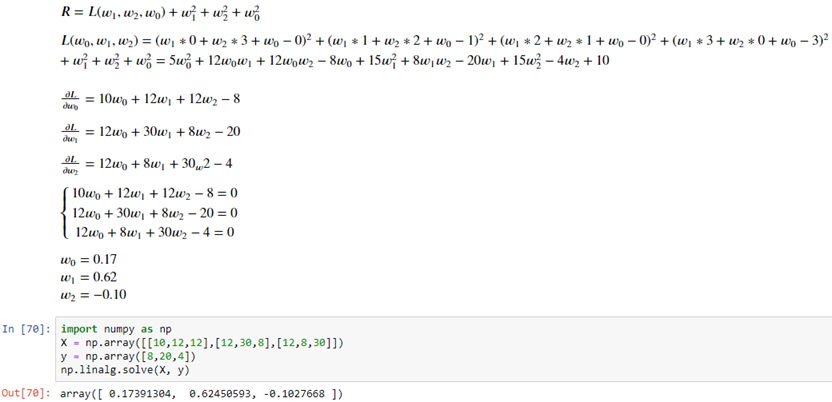

In [155]:
def manhattan_distance(a, b):
    return sum(abs(e1-e2) for e1, e2 in zip(a,b))

def xtrain_distance(row):
    distances = {}
    for i,each in df.iterrows():
        distances[i] = manhattan_distance(each,row)
    return distances

result = df.apply(xtrain_distance, axis=1)

# converting into dataframe
pd.DataFrame(dict(result)).transpose()

,W1,W2,W3,W4,W5,W6,W7
W1,0.0,27.0,25.0,27.0,37.0,27.0,NaN
W2,27.0,0.0,24.0,30.0,14.0,42.0,NaN
W3,25.0,24.0,0.0,18.0,38.0,34.0,NaN
W4,27.0,30.0,18.0,0.0,40.0,20.0,NaN
W5,37.0,14.0,38.0,40.0,0.0,46.0,NaN
W6,27.0,42.0,34.0,20.0,46.0,0.0,NaN
W7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
